In [1]:
import requests
from bs4 import BeautifulSoup as bsp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

import json
import time
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [2]:
# PYTHON으로 SQLITE3의 DB에 데이터 담기
dbname='20210630_wadizDB_최종.db'
def insData(d, tblname='wadiztable'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from '+tblname+' where ncategory="'+d+'"'
        ckkey=cur.execute(sql).fetchall()
        if ckkey:
            return ckkey

In [3]:
def category(d):
    data=insData(d)
    df=pd.DataFrame(data)
    names=['idx','category','title','content','supporter','amount','percent','key']
    df.columns=names
    encore = "앵콜"
    df['label'] = 0

    for i, title in enumerate(df['title']):
        if title.find(encore) > 0:
            df['label'].iloc[i] = 1
    return df

In [4]:
# https://newbedev.com/utf-8-codec-can-t-decode-byte-0xed-in-position-0-invalid-continuation-byte-code-example

In [5]:
df=category('스포츠·모빌리티')

C:\Users\pc\anaconda3\envs\py37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## 타이틀+컨텐츠

In [6]:
tdf = df.copy()
tdf['text'] = tdf['title'] + tdf['content']
tdf

,idx,category,title,content,supporter,amount,percent,key,label,text
0,15179,스포츠·모빌리티,기능성수건과 면수건의 장점을 모두 합쳤다! 신개념 휴대용 수건 트래부스트,"\n 여름 휴가 계획하시나요? 수건먼저 챙겨야죠! 기능성수건의 건조능력과, 면...",371,"17,322,700",3464,https://www.wadiz.kr/web/campaign/detail/112053,0,기능성수건과 면수건의 장점을 모두 합쳤다! 신개념 휴대용 수건 트래부스트\n ...
1,15180,스포츠·모빌리티,고생하는 내차에도 보약한첩!! 내차에도 자연에도 가격또한 착한 엔진보호탕,"\n 비싼 돈 주고 다른 연료 첨가제 쓰고 써봐도 별 차이도, 체감도 안 되신...",99,"1,731,900",173,https://www.wadiz.kr/web/campaign/detail/107804,0,고생하는 내차에도 보약한첩!! 내차에도 자연에도 가격또한 착한 엔진보호탕\n ...
2,15181,스포츠·모빌리티,"[1억8천앵콜]힘들게 테이핑 말고, 발목압박 테이핑양말&종아리압박 슬리브",\n 모든 스포츠게임의 승패는 아주 미세한 부분에서 승패가 갈리곤 합니다. [...,"1,030","32,274,600",6454,https://www.wadiz.kr/web/campaign/detail/109697,1,"[1억8천앵콜]힘들게 테이핑 말고, 발목압박 테이핑양말&종아리압박 슬리브\n ..."
3,15182,스포츠·모빌리티,발명가와 헬스 트레이너가 만든 0.55mm 손목보호대 [통기성 끝판왕],\n [손목보호대 두께가 0.55mm?!] 그동안 땀차고 갑갑한 손목보호대 ...,565,"21,501,200",4300,https://www.wadiz.kr/web/campaign/detail/114812,0,발명가와 헬스 트레이너가 만든 0.55mm 손목보호대 [통기성 끝판왕]\n [...
4,15183,스포츠·모빌리티,러너의 두 손에 자유를 드립니다. [BONE],"\n 손이 심플해지는 런닝의 마법, 거기다 수납까지 !\n암밴드의 혁명 런타이...",307,"9,206,700",920,https://www.wadiz.kr/web/campaign/detail/112315,0,러너의 두 손에 자유를 드립니다. [BONE]\n 손이 심플해지는 런닝의 마법...
...,...,...,...,...,...,...,...,...,...,...
757,15936,스포츠·모빌리티,"홈트레이닝부터 필라테스까지, 홈트 케이블 립풀",\n 홈트레이닝을 완성하다! 간편한 설치와 깔끔한 정리! 가벼운 무게와 부드러...,4,0,0,https://www.wadiz.kr/web/campaign/detail/111104,0,"홈트레이닝부터 필라테스까지, 홈트 케이블 립풀\n 홈트레이닝을 완성하다! 간편..."
758,22521,스포츠·모빌리티,마사지는 문질러야 제맛. 물리치료사 10년 경력을 담은 마사지기 #스트릭,\n 그동안 마사지하느라 힘드셨죠? 이제 한 손으로 쓱쓱- 문지르기만 하세요....,452,"35,412,000",3541,https://www.wadiz.kr/web/campaign/detail/116340,0,마사지는 문질러야 제맛. 물리치료사 10년 경력을 담은 마사지기 #스트릭\n ...
759,22522,스포츠·모빌리티,땡땡하고 뻐근한 다리에 강력한 압박과 냉찜질을 동시에 # 종아리를 부탁해,"\n 오늘도 고생한 다리를 위한 강력한 압박, 살벌한 시원함이 동시에! 간편하...",152,"6,660,000",666,https://www.wadiz.kr/web/campaign/detail/115666,0,땡땡하고 뻐근한 다리에 강력한 압박과 냉찜질을 동시에 # 종아리를 부탁해\n ...
760,22523,스포츠·모빌리티,"스윙만 해도 프로 골퍼 소리 듣는 법? 지비요, 내 자세를 고쳐줘!",\n 비싼돈으로 골프 레슨받아도 그때뿐인건 왜 일까요? 내의 스윙을 눈으로 보...,35,"2,214,000",442,https://www.wadiz.kr/web/campaign/detail/115698,0,"스윙만 해도 프로 골퍼 소리 듣는 법? 지비요, 내 자세를 고쳐줘!\n 비싼돈..."


In [7]:
catelist=['title','content']
for cat in catelist:
    del tdf[cat]
tdf

,idx,category,supporter,amount,percent,key,label,text
0,15179,스포츠·모빌리티,371,"17,322,700",3464,https://www.wadiz.kr/web/campaign/detail/112053,0,기능성수건과 면수건의 장점을 모두 합쳤다! 신개념 휴대용 수건 트래부스트\n ...
1,15180,스포츠·모빌리티,99,"1,731,900",173,https://www.wadiz.kr/web/campaign/detail/107804,0,고생하는 내차에도 보약한첩!! 내차에도 자연에도 가격또한 착한 엔진보호탕\n ...
2,15181,스포츠·모빌리티,"1,030","32,274,600",6454,https://www.wadiz.kr/web/campaign/detail/109697,1,"[1억8천앵콜]힘들게 테이핑 말고, 발목압박 테이핑양말&종아리압박 슬리브\n ..."
3,15182,스포츠·모빌리티,565,"21,501,200",4300,https://www.wadiz.kr/web/campaign/detail/114812,0,발명가와 헬스 트레이너가 만든 0.55mm 손목보호대 [통기성 끝판왕]\n [...
4,15183,스포츠·모빌리티,307,"9,206,700",920,https://www.wadiz.kr/web/campaign/detail/112315,0,러너의 두 손에 자유를 드립니다. [BONE]\n 손이 심플해지는 런닝의 마법...
...,...,...,...,...,...,...,...,...
757,15936,스포츠·모빌리티,4,0,0,https://www.wadiz.kr/web/campaign/detail/111104,0,"홈트레이닝부터 필라테스까지, 홈트 케이블 립풀\n 홈트레이닝을 완성하다! 간편..."
758,22521,스포츠·모빌리티,452,"35,412,000",3541,https://www.wadiz.kr/web/campaign/detail/116340,0,마사지는 문질러야 제맛. 물리치료사 10년 경력을 담은 마사지기 #스트릭\n ...
759,22522,스포츠·모빌리티,152,"6,660,000",666,https://www.wadiz.kr/web/campaign/detail/115666,0,땡땡하고 뻐근한 다리에 강력한 압박과 냉찜질을 동시에 # 종아리를 부탁해\n ...
760,22523,스포츠·모빌리티,35,"2,214,000",442,https://www.wadiz.kr/web/campaign/detail/115698,0,"스윙만 해도 프로 골퍼 소리 듣는 법? 지비요, 내 자세를 고쳐줘!\n 비싼돈..."


<AxesSubplot:>

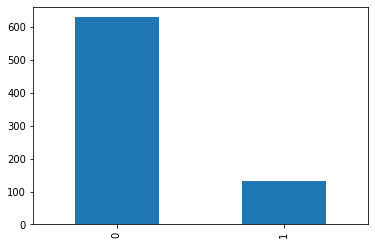

In [8]:
tdf['label'].value_counts().plot(kind = 'bar')

In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
x_train,x_test,y_train,y_test=train_test_split(tdf['text'],tdf['label'],test_size=0.2,shuffle=True,stratify=tdf['label'],random_state=11)

In [12]:
# def tknWord(txt):
#     kkma=Kkma()
#     kpos=kkma.pos(txt)
#     cate=['NNG','MAG','VV','NNP','NNB','VA','VCP','VCN','MAC']
#     tkn=[]
#     #print(kpos)
#     for k in kpos:
#         if(k[1] in cate):
#             if(len(k[0])>1):
#                 tkn.append(k[0])
#     return tkn

def tknWord(txt,cntlimit=0):
    kpos=tagger.pos(txt)
    cate=['NNG','MAG','VV','NNP','NNB','VA','VCP','VCN','MAC','MAJ','SF','VV+EC','VV+EP','EP','XR','VV+ETM']
    tkn=[]
    #print(kpos)
    for k in kpos:
        if(k[1] in cate):
            if(len(k[0])>cntlimit):
                tkn.append(k[0])
    return tkn

In [13]:
stopwordsstr = '아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'

In [14]:
# 불용어 제거
stopwords = stopwordsstr.split()

In [15]:
x_train= x_train.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]","")
# 한글과 공백을 제외하고 모두 제거
x_train[:5]

C:\Users\pc\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


648    확실한 한 방이 부족한 홈트 모두가 기다려온 데드리프트 홈 머신    놓치고 있던 ...
692    자전거의 가치를 높이는 트렌디한 커스터마이징 바스켓 insideB    어렵게 고른...
329    땀이란게 폭발했다 기능성 원단의 트레이닝복  부스터슈트     가벼운 운동에도  땀...
252    자전거 라이더의 필수템 스피드케이던스 측정 센서 B SHARK    자전거 라이더 ...
160    앵콜 펀딩 물리치료사와 작업치료사가 연구 개발한 손목보호대    로모슈 손목보호대 ...
Name: text, dtype: object

In [16]:
from eunjeon import Mecab
tagger=Mecab()

In [17]:
rn=np.ravel(x_train)
x_train_prep = []
for sentence in x_train:
    #temp_X = okt.morphs(sentence, stem=True)
    temp_X = tknWord(sentence)
    temp_X_tr_stop = [word for word in temp_X if not word in stopwords] # 불용어 제거
    x_train_prep.append(temp_X_tr_stop)

In [18]:
x_train_prep[0]

['확실',
 '방',
 '부족',
 '홈',
 '트',
 '드리프트',
 '홈',
 '머신',
 '놓치',
 '핵심',
 '근력',
 '운동',
 '데드',
 '리프트',
 '중량',
 '바벨',
 '없이',
 '운동',
 '효율',
 '낮',
 '대부분',
 '홈',
 '트',
 '마니아',
 '분',
 '포기',
 '운동',
 '이제',
 '마음껏',
 '가장',
 '대표',
 '웨이트',
 '트레이닝',
 '운동',
 '복부',
 '둔부',
 '다리',
 '연관',
 '근육',
 '광범위',
 '널리',
 '행해',
 '쿼트',
 '벤치',
 '프레스',
 '높',
 '무게',
 '겨루',
 '파워리프팅',
 '종목',
 '흔히',
 '운동',
 '목적',
 '다리',
 '근육',
 '엉덩이',
 '근육',
 '단련',
 '위한',
 '다리',
 '앞부분',
 '대퇴',
 '사두근',
 '뒷부분',
 '햄',
 '스트링',
 '단련',
 '엉덩이',
 '대표',
 '근육',
 '대둔근',
 '둔근',
 '소둔',
 '근도',
 '단련',
 '부수',
 '복근',
 '근육',
 '넓',
 '영향',
 '중량',
 '운동',
 '기구',
 '포기',
 '복합',
 '이유',
 '어울리',
 '운동',
 '기구',
 '개발',
 '였',
 '중량',
 '대체',
 '운동',
 '가능',
 '풀',
 '업',
 '밴드',
 '사용',
 '완성',
 '드리프트',
 '홈',
 '머신',
 '풀',
 '업',
 '밴드',
 '체중',
 '견딜',
 '가장',
 '고장',
 '개발',
 '제품군',
 '자작',
 '합판',
 '하부',
 '스틸',
 '프레임',
 '한번',
 '받쳐',
 '튼튼',
 '구조',
 '마음껏',
 '고강',
 '데드',
 '리프트',
 '즐기',
 '겠',
 '업무',
 '퇴근',
 '휴일',
 '당기',
 '운동',
 '날',
 '미루',
 '마시',
 '당기',
 '사무실',
 '센터',
 '사용',
 '중량',
 '운동',
 '중

In [19]:
rn=np.ravel(x_test)
x_test_prep = []
for sentence in x_test:
    #temp_X = okt.morphs(sentence, stem=True)
    temp_X = tknWord(sentence)
    temp_X_tst_stop = [word for word in temp_X if not word in stopwords] # 불용어 제거
    x_test_prep.append(temp_X_tst_stop)

In [20]:
x_test_prep[0]

['세차',
 '즐겁',
 '방법',
 '프리미엄',
 '세차',
 '용품',
 '패키지',
 '세차',
 '지겹',
 '힘드',
 '?',
 '미국',
 '프리미엄',
 '세차',
 '용품',
 '브랜드',
 '프로',
 '차량',
 '관리',
 '더욱',
 '쉽',
 '즐길',
 '도와',
 '겠',
 '.',
 '용품',
 '골라야',
 '편하',
 '즐겁',
 '!',
 '세차',
 '처음',
 '접하',
 '분',
 '가장',
 '고민',
 '부분',
 '제품',
 '선택',
 '.',
 '셀프',
 '세차',
 '관련',
 '제품',
 '선택',
 '범위',
 '너무',
 '넓',
 '제품',
 '구매',
 '사용',
 '갈피',
 '잡',
 '.',
 '추천',
 '!',
 '근본',
 '목표',
 '쉽',
 '자세',
 '제품',
 '설명',
 '통해',
 '차',
 '깔끔히',
 '해',
 '상태',
 '유지',
 '더욱',
 '쉽',
 '즐겁',
 '즐길',
 '.',
 '프로',
 '세차',
 '쉽',
 '간편',
 '즐기',
 '!',
 '이하',
 '프로',
 '미국',
 '캘리포니아',
 '제곱',
 '피트',
 '규모',
 '제조',
 '포장',
 '공장',
 '운영',
 '카디',
 '테일',
 '케어',
 '제품',
 '생산',
 '.',
 '차',
 '사랑',
 '가꾸',
 '사용',
 '가능',
 '쉽',
 '자세',
 '제품',
 '설명',
 '통해',
 '자동차',
 '상태',
 '최상',
 '유지',
 '위해',
 '서비스',
 '제품',
 '개발',
 '열정',
 '갖',
 '운영',
 '전문',
 '브랜드',
 '.',
 '프로',
 '로고',
 '의미',
 '과정',
 '즐기',
 '!',
 '회사',
 '모토',
 '.',
 '셀프',
 '세차',
 '세차',
 '시',
 '분',
 '취미',
 '마음',
 '힐링',
 '겠',
 '처음',
 '시작',
 '분',
 '마냥',
 '이제',
 '막',
 '해',
 '

In [21]:
y_train

648    0
692    0
329    0
252    0
160    1
      ..
37     1
300    0
726    0
548    0
256    1
Name: label, Length: 609, dtype: int64

In [22]:
# https://julee23.tistory.com/15

In [23]:
# 'utf-8' codec can't decode byte 0xed in position 0: invalid continuation byte

In [24]:
x_train_prep[:1]

[['확실',
  '방',
  '부족',
  '홈',
  '트',
  '드리프트',
  '홈',
  '머신',
  '놓치',
  '핵심',
  '근력',
  '운동',
  '데드',
  '리프트',
  '중량',
  '바벨',
  '없이',
  '운동',
  '효율',
  '낮',
  '대부분',
  '홈',
  '트',
  '마니아',
  '분',
  '포기',
  '운동',
  '이제',
  '마음껏',
  '가장',
  '대표',
  '웨이트',
  '트레이닝',
  '운동',
  '복부',
  '둔부',
  '다리',
  '연관',
  '근육',
  '광범위',
  '널리',
  '행해',
  '쿼트',
  '벤치',
  '프레스',
  '높',
  '무게',
  '겨루',
  '파워리프팅',
  '종목',
  '흔히',
  '운동',
  '목적',
  '다리',
  '근육',
  '엉덩이',
  '근육',
  '단련',
  '위한',
  '다리',
  '앞부분',
  '대퇴',
  '사두근',
  '뒷부분',
  '햄',
  '스트링',
  '단련',
  '엉덩이',
  '대표',
  '근육',
  '대둔근',
  '둔근',
  '소둔',
  '근도',
  '단련',
  '부수',
  '복근',
  '근육',
  '넓',
  '영향',
  '중량',
  '운동',
  '기구',
  '포기',
  '복합',
  '이유',
  '어울리',
  '운동',
  '기구',
  '개발',
  '였',
  '중량',
  '대체',
  '운동',
  '가능',
  '풀',
  '업',
  '밴드',
  '사용',
  '완성',
  '드리프트',
  '홈',
  '머신',
  '풀',
  '업',
  '밴드',
  '체중',
  '견딜',
  '가장',
  '고장',
  '개발',
  '제품군',
  '자작',
  '합판',
  '하부',
  '스틸',
  '프레임',
  '한번',
  '받쳐',
  '튼튼',
  '구조',
  '마음껏',
  '고강',
  '데드'

리뷰의 최대 길이 : 2329
리뷰의 평균 길이 : 600.4663382594417


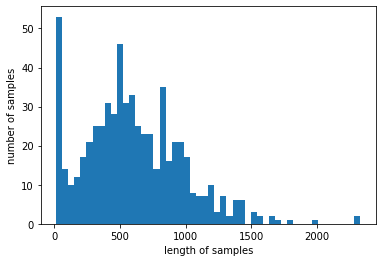

In [25]:
print('리뷰의 최대 길이 :',max(len(l) for l in x_train_prep))
print('리뷰의 평균 길이 :',sum(map(len, x_train_prep))/len(x_train_prep))
plt.hist([len(s) for s in x_train_prep], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [27]:
below_threshold_len(1250, x_train_prep)

전체 샘플 중 길이가 1250 이하인 샘플의 비율: 94.58128078817734


In [28]:
below_threshold_len(1000, x_train_prep)

전체 샘플 중 길이가 1000 이하인 샘플의 비율: 86.5353037766831


In [29]:
from keras.preprocessing.text import Tokenizer

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train_prep)

In [31]:
print(tokenizer.word_index)

{'펀딩': 1, '사용': 2, '제품': 3, '시': 4, '운동': 5, '가능': 6, '었': 7, '리워드': 8, '분': 9, '서포터': 10, '개발': 11, '통해': 12, '디즈': 13, '배송': 14, '제작': 15, '겠': 16, '프로젝트': 17, '결제': 18, '위해': 19, '진행': 20, '안전': 21, '페이지': 22, '자전거': 23, '마감': 24, '였': 25, '디자인': 26, '기능': 27, '시작': 28, '다양': 29, '문의': 30, '확인': 31, '해': 32, '발생': 33, '스포츠': 34, '변경': 35, '교환': 36, '발송': 37, '가장': 38, '사이즈': 39, '필요': 40, '방법': 41, '이후': 42, '착용': 43, '차': 44, '쉽': 45, '생산': 46, '효과': 47, '배터리': 48, '정책': 49, '매트': 50, '보호': 51, '골프': 52, '부분': 53, '위한': 54, '밴드': 55, '해당': 56, '메이커': 57, '양말': 58, '금': 59, '차량': 60, '예정': 61, '브랜드': 62, '카드': 63, '추가': 64, '소재': 65, '국내': 66, '제공': 67, '딩': 68, '보드': 69, '기간': 70, '발': 71, '주행': 72, '았': 73, '기존': 74, '가격': 75, '기술': 76, '자세': 77, '없이': 78, '근육': 79, '일반': 80, '장착': 81, '또는': 82, '대한': 83, '반환': 84, '관리': 85, '자동차': 86, '더욱': 87, '건강': 88, '드립니다': 89, '몸': 90, '문': 91, '맞': 92, '이용': 93, '성공': 94, '높': 95, '정보': 96, '취소': 97, '직접': 98, '코팅': 99, '연구': 100, '잡': 101

In [32]:
# 토큰화
threshold = 3
total_cnt = len(tokenizer.word_index) 
print(total_cnt)# 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

15396
단어 집합(vocabulary)의 크기 : 15396
등장 빈도가 2번 이하인 희귀 단어의 수: 7113
단어 집합에서 희귀 단어의 비율: 46.20031176929073
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.5437262773323415


In [33]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8284


In [34]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(x_train_prep)
x_train = tokenizer.texts_to_sequences(x_train_prep)
x_test = tokenizer.texts_to_sequences(x_test_prep)

In [35]:
x_train[:10]

[[856,
  1481,
  235,
  160,
  227,
  2295,
  160,
  640,
  1060,
  839,
  448,
  5,
  3516,
  2029,
  702,
  1580,
  78,
  5,
  401,
  670,
  300,
  160,
  227,
  3517,
  9,
  982,
  5,
  155,
  2429,
  38,
  219,
  927,
  163,
  5,
  894,
  7063,
  605,
  7064,
  79,
  5583,
  1505,
  600,
  3086,
  2585,
  95,
  125,
  7065,
  7066,
  1729,
  1429,
  5,
  811,
  605,
  79,
  904,
  79,
  1557,
  54,
  605,
  4727,
  6166,
  7067,
  5584,
  4728,
  4418,
  1557,
  904,
  219,
  79,
  4729,
  2430,
  1557,
  4730,
  2141,
  79,
  583,
  659,
  702,
  5,
  110,
  982,
  3367,
  178,
  1008,
  5,
  110,
  11,
  25,
  702,
  2296,
  5,
  6,
  323,
  461,
  55,
  2,
  427,
  2295,
  160,
  640,
  323,
  461,
  55,
  849,
  2142,
  38,
  850,
  11,
  5077,
  7068,
  4419,
  6167,
  3223,
  606,
  1088,
  1730,
  582,
  217,
  2429,
  2228,
  3516,
  2029,
  271,
  16,
  994,
  3716,
  4731,
  1319,
  5,
  190,
  5078,
  1231,
  1319,
  1102,
  211,
  2,
  702,
  5,
  702,
  5,
  3516,
  20

In [36]:
len(x_train[0])

621

In [37]:
def padding(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print((max_len, (cnt / len(nested_list))))

In [38]:
max_len = 1000
padding(max_len,x_train)

(1000, 0.8817733990147784)


In [39]:
from keras.preprocessing.sequence import pad_sequences

In [40]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

In [41]:
x_train.shape

(609, 1000)

In [42]:
x_test.shape

(153, 1000)

In [43]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [44]:
model = Sequential()
model.add(Embedding(vocab_size, 100,input_length = max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [45]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 4회이상 val_loss 증가시 ealry stop
mc = ModelCheckpoint('mecab_2', monitor='val_acc', mode='max', verbose=1, save_best_only=True) # 정확도가 높아지는 경우에만 모델저장

In [46]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20,  callbacks=None, batch_size=60, validation_split = 0.2)

Epoch 1/20
9/9 [==============================] - 31s 3s/step - loss: 0.5838 - acc: 0.7741 - val_loss: 0.5567 - val_acc: 0.8607
Epoch 2/20
9/9 [==============================] - 28s 3s/step - loss: 0.5154 - acc: 0.8172 - val_loss: 0.4835 - val_acc: 0.8607
Epoch 3/20
9/9 [==============================] - 25s 3s/step - loss: 0.4271 - acc: 0.8172 - val_loss: 0.3831 - val_acc: 0.8607
Epoch 4/20
9/9 [==============================] - 26s 3s/step - loss: 0.3531 - acc: 0.8398 - val_loss: 0.4040 - val_acc: 0.8443
Epoch 5/20
9/9 [==============================] - 27s 3s/step - loss: 0.3185 - acc: 0.8789 - val_loss: 0.3932 - val_acc: 0.8443
Epoch 6/20
9/9 [==============================] - 26s 3s/step - loss: 0.2310 - acc: 0.9055 - val_loss: 0.4570 - val_acc: 0.8197
Epoch 7/20
9/9 [==============================] - 25s 3s/step - loss: 0.2185 - acc: 0.9138 - val_loss: 0.4803 - val_acc: 0.7951
Epoch 8/20
9/9 [==============================] - 26s 3s/step - loss: 0.2372 - acc: 0.9035 - val_loss: 0

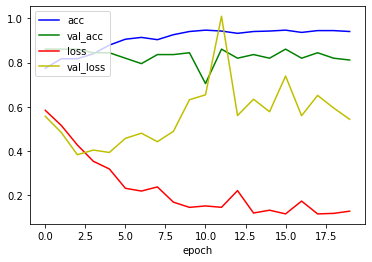

In [47]:
accu = plt.subplot()

# loss.plot(history.history['loss'], 'y', label='loss')
# loss.plot(history.history['val_loss'], 'r', label='val loss')
# loss.set_xlabel('epoch')
# loss.legend(loc='upper left')

accu.plot(history.history['acc'], 'b', label='acc')
accu.plot(history.history['val_acc'], 'g', label='val_acc')
accu.set_xlabel('epoch')
accu.legend(loc='upper left')

accu.plot(history.history['loss'], 'r', label='loss')
accu.plot(history.history['val_loss'], 'y', label='val_loss')
accu.set_xlabel('epoch')
accu.legend(loc='upper left')

plt.show()


In [48]:
pred = model.predict(x_test)


In [49]:
len(pred)

153

In [50]:
pred

array([[0.08044133],
       [0.01022422],
       [0.17808014],
       [0.19448614],
       [0.01029748],
       [0.6426898 ],
       [0.05730289],
       [0.6728387 ],
       [0.3335203 ],
       [0.10297164],
       [0.00431392],
       [0.00360706],
       [0.06493288],
       [0.08677307],
       [0.19288737],
       [0.08872733],
       [0.00568759],
       [0.02959892],
       [0.2952802 ],
       [0.9970796 ],
       [0.47376978],
       [0.98999166],
       [0.27834737],
       [0.39142042],
       [0.01127449],
       [0.01325402],
       [0.09972587],
       [0.02365315],
       [0.08735859],
       [0.9967629 ],
       [0.00430706],
       [0.8130459 ],
       [0.8525547 ],
       [0.07259619],
       [0.04934579],
       [0.44971272],
       [0.22409257],
       [0.00868335],
       [0.6748023 ],
       [0.08736277],
       [0.04710373],
       [0.10309651],
       [0.08487678],
       [0.02669758],
       [0.05583909],
       [0.8810806 ],
       [0.07647613],
       [0.184

In [51]:
cnt = 0
for p in pred:
    print(p[0])
    if p[0] > 0.5:
        cnt += 1 
    else:
        continue
print("테스트 데이터 예상 성공률",cnt/len(pred))


0.080441326
0.010224223
0.17808014
0.19448614
0.010297477
0.6426898
0.057302892
0.6728387
0.3335203
0.10297164
0.004313916
0.0036070645
0.06493288
0.08677307
0.19288737
0.088727325
0.0056875944
0.029598922
0.2952802
0.9970796
0.47376978
0.98999166
0.27834737
0.39142042
0.011274487
0.013254017
0.09972587
0.02365315
0.087358594
0.9967629
0.0043070614
0.8130459
0.8525547
0.07259619
0.04934579
0.44971272
0.22409257
0.008683354
0.6748023
0.087362766
0.047103733
0.103096515
0.084876776
0.026697576
0.05583909
0.8810806
0.07647613
0.1842821
0.9970796
0.19871894
0.006093353
0.02815628
0.9850277
0.16135147
0.08648285
0.04905969
0.07335657
0.01899299
0.6943655
0.7189978
0.028692573
0.017485648
0.8079276
0.09915537
0.12095973
0.545553
0.10161999
0.013969243
0.024600118
0.012790322
0.0118997395
0.43137702
0.09581864
0.46672934
0.020826519
0.010217518
0.053736806
0.81294537
0.98074996
0.08736047
0.08735561
0.04619345
0.009899676
0.40483654
0.0117881
0.48084226
0.97815675
0.0555602
0.23470709
0.07222

In [52]:
eva = model.evaluate(pred, y_test)

5/5 [==============================] - 1s 4ms/step - loss: 0.6530 - acc: 0.8235


In [53]:
print(eva)

[0.652958333492279, 0.8235294222831726]


In [54]:
model.save("mecab_2")

INFO:tensorflow:Assets written to: mecab_2\assets


INFO:tensorflow:Assets written to: mecab_2\assets


In [55]:
loaded_model = load_model("mecab_2")

In [56]:
def sentiment_predict(new_sentence):
    new_sentence = tknWord(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    # print(new_sentence)
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    print(score)
    if(score > 0.5):
        print('성공')
    else:
        print('실패')

In [57]:
# 앵콜펀딩 [13018%앵콜] 3만원대 스포츠웨어 이시국에 헬스장 공용복 입으세요? https://www.wadiz.kr/web/campaign/detail/89464
sports_1 = '''

    부담되는 값비싼 스포츠브랜드, 오래 입을 수 있는 퀄리티, 기능성을 모조 리 때려 박은 스포츠웨어 싸구려 중국산이 아닌 스포츠웨어 전문 공장에서 직접 생산 하였습니다.
    
          반바지는 하체 근육을 잡아주지 못 할까...? 운동 선수들이 레깅스를 입는 이유  어떤 운동이든, 어떤 중량이든, 어떤 고립감이든 자유롭게 운동하세요~! (리얼 후기) 남자들이라면, 공감하는 땀이 차는 사타구니  냄새 or 습집에 가장 큰 원인은 땀 입니다. 땀이 많이 날수록 통기성이 좋은 옷을 선택 해야 합니다 땀으로 인해 습한상태가 지속되면 곰팡이균이 생성되며 사타구니 습진에 걸립니다. * 온도가 상승하게 되면 배우자나 다른 신체부위로 옮아가는 경우가 있음 *       운동인이라면 지켜야하는 매너!  겉감이 방수로 되어 땀이 많이 나더라도 묻어나지 않습니다. (매너있는 운동인)  겉감도 신축성이 좋아 빳빳한 느낌이 없습니다.       땀이 나면 티나는 겨땀! 일반 면T(겨드랑이 땀);;;;;;   통기성 없어서 답답하고 유독 튀어나온 제3의 눈   땀이 묻어 돌아오지 않는 티..몇번  빨았더니 다 늘어났...ㅡ,ㅡ  땀이 닿는 순간 빠르게 건조  *흡한속건*  타사 23도 vs 바벨러 18도 열 화상 TEST : 땀 배출 99% 통기성으로  쿨링감을 느끼실 수 있습니다.    국가대표 팀 제작 공장에서 직접 제작!        허벅지 두께가 보통이라고 생각하시면 m, 두꺼운 편이시면 L을 선택해주세요. 완전 압박으로 입으실꺼면 사이즈 다운 하셔도 됩니다. / 사이클를 하여 다리가 두꺼운 편이시면! L 선택! 겉감 / 안감 신축성이 좋아, 많이 두꺼우신분들엔 타이트한 느낌을 받아 좋습니다. * 여성분들은 M 사이즈로 입으셔도 무관 합니다.           리워드 구성은 하단을 참고해 주세요.     리워드 발송 시작일 : 10월 28일 펀딩이 종료된후 4일간 결제 후 10월 28일부터 초기 생산분에 대해 순차적 즉시 발송 일일 최대 100장 초기 생산분 재고 품절시 제작기간 약 2주 소요되며, 새소식을 통해 생산/재고 현황을 알려드립니다. 1) 리워드 하자가 아닌 경우 리워드의 특성상, 아래의 항목들이 발생할 수 있으며 이는 리워드의 하자/불량이 아닙니다. 펀딩 시 이 점을 유의해주세요.  리워드 수령으로부터 7일 이내에 발생한 초기 하자에 대해서는 본 A/S정책이 적용되지 않습니다.   펀딩금은  국내 스포츠웨어 브랜드가 해외 브랜드보다 높은 퀄리티의 제품을 제작 할 수있다는것을 보여드리고 싶었으며, 서포터분들께  합리적인 가격으로 기능성 스포츠웨어를 개발하고 제공하기 위해 사용될 예정이며, 많은 분들에게 소개 될 수 있도록 앵콜 펀딩에 참여 부탁드리며, 원가를 낮추고 퀄리티는 높이며 서포터분들께 합리적인 리워드를 제공하는데 사용될 예정입니다. Q: 바벨러 스포츠웨어는 남성용 인가요? 네  남성용 제작 되었습니다. 하지만 여성고객분들도 상의 M 사이즈(오버핏) 맞으십니다. 하의는 M 사이즈가 맞으시며, 앵콜 펀딩 후 더 마르신 분들을 위해 S 사이즈 패턴도 준비 되어 있습니다.  Q: 펀딩 종료 후에도 구매할 수 있나요? 와디즈 앵콜 펀딩또는, 기타 플랫폼을 통해 발매예정입니다. 자사몰/기타 플랫폼 런칭시에는 와디즈 펀딩가가 아닌 정상가에 판매됩니다.  Q: 바벨러 스포츠 웨어는 더 큰사이즈나 작은사이즈는 없나요? S~2XL사이즈까지  패턴이 준비되어 있으며, 많은 요청이 생기면 금번 펀딩이 끝나고 앵콜펀딩또는 기타 플랫폼을 통해 추가로 출시할 예정입니다.  Q: 펀딩 후, 옵션/배송지/카드 정보 변경은 어떻게 해야하나요? 펀딩 마감일 전까지 '펀딩내역' 페이지에서 수정하실 수 있습니다. 펀딩 마감 이후, 불가피한 사유로 배송지 변경하셔야 하는 분은 해당 페이지 내 '메이커에게 문의하기'를 통해서 문의해 주세요.  Q: 교환/펀딩금 반환 규정은 어떻게 되나요? - 서포터님에 의한 제품, 택 멸실, 훼손 또는 오염되었을 경우 펀딩금 반환/교환이 불가합니다. 제품 및 포장 상태가 재판매 가능하여야 합니다.
'''

In [58]:
sentiment_predict(sports_1)

0.6453437209129333
성공


In [82]:
# 강남 1% 슈퍼카들의 반짝이는 피부 비결!! 지금 공개합니다  https://www.wadiz.kr/web/campaign/detail/96265
sports_f_1 ='''

    
    운전자 90%가 모르는 내차 돋보이게 하는법. 유리막코팅, 왁스 어렵고 비싼줄 아셨다구요? 이젠 그렇지 않아요~ 뿌리는 코팅왁스 P17 하나로 항상 새차같은 컨디션을 유지하세요.
    
   '자동차에도 피부가 있다' • 볼라솔루션의 대표 이한영 입니다. 카케어 시장 현업에 종사하면서 가장 많이 생각하는 두 가지가 있는데, 바로 '어떻게 만들면 깨끗함을 오래 유지할까' 와 '어떻게 만들면 더 글로시할까' 입니다. 가끔 길에서 유독 반짝이는 자동차를 보고 "우와~" 해보신 적 한 번쯤은 있으시죠? 여러분의 자동차도 그렇게 될 수 있어요. 저희가 한 번에 두 가지가 다 되는 제품을 만들었거든요.   어렵지 않아요 누구나 할 수 있어요누구나 알 수 없었을 뿐입니다  유리막 코팅 가격을 알아보니 50~100.. , 헉 200?...;;; 1-2일을 맡겨야 한다는 불편함까지, 어느덧 내 차를 아껴줄꺼야 라는 생각은 잊혀지고, 그냥 이동수단으로 전락해버린 경우가 대부분이었을 거에요. 그래서 저희는 유리막과 왁스 두개를 하나로 융합할 수는 없을까? 더 저렴할 수 없을까? 더 편할 수 없을까? 라는 생각으로 부터 시작해서 3년간 업그레이드를 계속 해왔습니다. 뿌리고쓱싹하면  이랬던내차가  마법처럼변한다  모든 라인이 선명해진다       자동차 역사의 본토 영국에서는 이미 1800년 중반 부터 활성화된 사업이며 유럽에서는 이것을 ‘Detailing'이라고 말합니다. 피부를 관리하는 스킨케어와 같은 개념 입니다. 영국으로 수출하는 디테일링 브랜드 ‘볼라솔루션’의 신제품 P17 코팅왁스를 런칭 합니다.       저희는 이런 제품을 만들어요자동차의 세심한 부분까지 터치하죠   장담하는데 90%는 "구라" 입니다. 저희는 프리미엄 유리막 코팅제를 제조하는 회사이기 때문에 시장의 생리를 너무나도x100 잘 알고 있습니다. 주변의 친구, 지인, 친척 중에 현업 딜러가 있으시다면 꼭 한번 물어봐 주세요. "차 한대 팔아서 100만원이 안남는데 50-100짜리 서비스를 어떻게 해줌?" 이라고 대답하실 거에요.  여러분은 그동안 속고 있었습니다 하루에 수십 대를 작업해야 하므로 농도가 약해서 시공하기 쉬운 스펙의 유리막에 볼라솔루션 보증서를 포함해서 납품할 수 있겠느냐라고 말이죠.(당연히 안 해요), IN 팩트만 말씀드리자면, 여기서 농도가 약해서 엄청 쉽고 빠르게 시공할 수 있는 유리막이란 바로 지금 펀딩에 내놓은 P17 스펙 정도의 성능과 작업성을 말하는 거예요. 딜러사의 서비스 유리막 코팅 90%는 작업장에 5-10만원을 결재합니다. 그냥 세차하고 왁스 바른 비용인 거죠. 차라리 직접 해보시면 어떨까요? 시중의 유리막 코팅제는 50ml를 기준으로 유통되고 있습니다. 네. 한 병 이상을 한 통에 퐁당 담갔어요. 전문용어로 '쏘맥?' 을 떠올리시면 이해가 빨리 되실 거예요. 여기서 중요한 포인트는 13%보다 높다고 해서 무조건 좋은 건 아니라는 겁니다. 소맥 5:5 비율이면 여러분은 꽐X가 되죠... 같은 이치로 SiO² 50%면 여러분의 차는 더 이상 손쓸 수 없는 상태로 얼룩덜룩 해져요. 뿌리는 코팅왁스 P17에는 수많은 SiO² 원료들 중에서 '좋은원료 & 고급원료' 만 엄선하여 배합한 볼라솔루션 특제 마법의 소스? 13%가 첨가되었습니다. '어떻게 하면 누구나 사용 가능하고 효과는 뛰어날까'라는 집념으로 3년의 연구 끝에 찾아낸 비율이에요.   펀딩금액 27,000원(2년치)디자인도 남달라!! 성능은 아트!!#갬성은덤 #펀딩은성공적   금형제작 레알트루 갬성은 찐텐이로다 묻고 더블로가!! BolaSolution®  스스로에 대한 질문이 와디즈 펀딩을 결심하게 된 계기가 되었어요. 런칭을 준비하면서부터 지금까지 '이 제품이 디테일링 시장을 들썩하게 할꺼야' 라는 자신감은 무모했던 것이었는지, 꿈이 현실이 될지는 알 수 없지만, BolaSolution® P17을 많은 사람에게 소개하고 싶었고 나아가서 매출로까지 이어질 수 있다면,  스타트업에게 와디즈 만큼 좋은 플랫폼은 없다고 생각했습니다. 이 펀딩이 성공적으로 종료된다면, 저희의 궁극적인 목표인 '찐' 브랜드를 향한 브랜딩, 디자인, 해외진출에 더 많은 투자를하고, 무엇보다 그동안 접근에 한계를 느꼈던 고가 원료들을 도입해서 R&D(연구개발)에 보다 많은 투자를 해보고 싶어요.     유리막 코팅은 비싸고 매번 왁스 칠 하기엔 귀찮고, 안 하자니 께름? 했죠. 아님 필요성을 몰라서 안 했거나요. 볼라솔루션의 뿌리는 코팅왁스 P17은 유리막 코팅과 왁스를 융합하여 사용하기 완전 편하도록 스프레이 타입으로 개량된 제품입니다. 세차 후 가볍게 문질러주면 시공이 끝나고 효과는 2-3개월 유지됩니다. 1년에 4회만 시공하면 50-100만원 하는 유리막 코팅의 발수 효과와 차량의 색상이 또렷해지는 효과를 톡톡히 볼 수 있다는 뜻이죠. 여기서 유리막 코팅이란(Ceramic Coating) 페인트층 보호를 위한 무기질 원료인 이산화규소 즉 SiO²를 자동차의 페인트층 위에 Quartz(석영) 보호막을 만들어 주는 것을 말하는데, 이러한 시공은 시간과 공간과 비용 문제로 소비자가 접근하기에 많은 어려움이 있었습니다. #전문가영역 볼라솔루션은 이러한 고객의 니즈를 파악하여 어떻게 하면 쉽고 간단하며 저렴하게 소비자가 직접 사용하게 만들 수 있을까?에 대해 오랜 시간 고민하며 발전시켜 왔습니다. 그 결과 주원료를 Sealant화 하는데 있어 끝없는 실험을 통해 저희가 생각하는 황금 비율을 찾는데 주목하였고, 드디어 스프레이 타입으로 사용하지만, 왁스가 아니라 코팅이다 라고 표현할 수 있게된  BolaSolution® P17을 선보일 수 있게 되었어요. 맥시마이져란 볼라솔루션의 오너용 시리즈 이름이며 완 • 벽 • 주 • 의 • 자 를 의미하는 말이에요. 조금 더 정확히는 무엇을 하더라도 세심, 꼼꼼, 정확하고 누가 확인하고 지켜보지 않더라도 스스로 만족하는 기준치가 일반인보다 훨씬 높은 사람을 뜻합니다. 보시다시피 이번 신제품 정말 완벽하게 만들려고 노력했어요. 저는 맥시마이져이니까 #하하   ( P17은 모델명, MAXIMIZER는 시리즈명) 뿌리고  닦으면  좔좔좔  또로록     지워지지 않는 물때 (워터스팟), 타월기스, 새똥자국, 벌래자국, 타르, 철분, 흙먼지 등은 괜찮은 왁스를 주기적으로 발라주는 것만으로 70%이상 방지할 수 있어요. 우리가 샤워를 하고 나면 스킨도 바르고 로션도 발라야 피부가 뒤집어지지 않잖아요. 자동차도 똑같아요. 외부의 오염공격을 막아줄 보호층 한 겹이 존재하고 있어야만, 물때나 새똥, 벌래자국 같은 산(acidic)이나 알칼리(alkali)가 페인트층을 파고 들어가지 못하는 원리에요. 하지만 이걸 세차할 때마다 바르기엔 귀찮으니까 2-3개월에 한 번만 발라도 되는 포뮬러(formulation)로 개발한 상품이 뿌리는 코팅왁스 P17 인겁니다. +@로 오염이 안되니 세차 회수가 줄어드는 경제적인 효과까지 넘나 좋은것!! 볼라솔루션 코팅의 기술력      석유화학기술 선진국인 대한민국의 코팅제 및 세정제 개발자들은 이미 내수시장을 뛰어넘어 세계로 뻗어나가 있습니다. 다만 브랜딩 능력이 취약하여 해외 브랜드에 OEM, ODM 방식으로 이뤄지고 있을 뿐. 그 성능은 특히 유럽시장에서 각광받으며 세계적으로 가장 많이 팔리는 코팅제 5개 중 3개가 국내생산일 정도로 우수한 성능을 인정받고 있습니다. 여러분은 역수입된 '마데인코리아'를 사용하고 계셨습니다 #비싸게    저희는 글로벌 카케어 브랜드 G사 F사 DISTRIBUTOR 및 국내유명 M사 제품을 제작했던 경험을 바탕으로 BolaSolution®을 런칭하게 되었는데요. 가장 몰입했던 부분은 '아 진짜 프리미엄 답게 프리미엄을 만들어보자' 였습니다. 이제는 전문가 시장과 소비자 시장에 맞는 프리미엄을 구분하고 '소비자가 사용하는 진짜 프리미엄'을 개발하는데 집중하고 있어요. 일부는 1% 다르다고라고 표현하지만 전체 용량중 10% 첨가되는 원료가 1% 차이 난다면, 이건 ±10%이지 1%가 아닌 겁니다. 그런 근소한 차이로 확연하게 다른 결과물을 만들어내는 것이 화학이고 성격상 0.1% 단위까지 쪼개서 데이터 값을 축적해온 것이 저희만의 포뮬러를 만든 노하우라면 노하우이겠죠 #사실은노가다 깊어지는 색감이 보이시나요?   현대 사회에서 자동차는 단순한 이동 수단이 아니라, 그 사람의 성격 또는 이미지를 나타내거나 때로는 재테크의 수단이 되기도 합니다. 차가 깨끗하면 사람이 반듯해 보이는 이미지를 줄 수 있고, 특히 중고차 매매를 해보신 분들은 아시겠지만, 외관 문제 삼아서 돈 100만원은 쉽게 뚝딱 '쇼부' 보잖아요. 그때 '아 좀 깨끗하게 탈걸' 또는 팔려고 세차해놓고 보니 '아직 괜찮은데? 아 평소에도 좀 깨끗하게 탈걸' 이런 생각을 저도 해본 적이 있거든요. #관리는필수입니다     이런 분들에게 꼭 필요합니다.몇개인지 체크 해보세요   지금 와디즈 펀딩에 참여하시면 다음과 같은 혜택을 제공 해드려요     Q. 리워드 하자가 아닌 경우가 있나요?A. 자동차의 표면 위에 뿌리기만 하고 닦아내지 않는다면, 그대로 자국이 남아 지워지지 않을 수 있어요. 차량에 손대기도 뜨거운 여름엔 더욱더 자국이 남을 수 있습니다. 이 부분은 하자가 아니며, 직사광선을 피해 그늘진 곳에서 시공하시고 특히 여름엔 해가 진 밤에 시공하시는 걸 추천드립니다. Q. 펀딩과 쇼핑은 무엇이 다른가요?A. 이번 프로젝트를 통해 소개하는 '뿌리는 코팅왁스 P17'은 시중에서 판매되고 있는 제품이 아니며, 서포터님의 펀딩을 통해 만들어지고 있습니다. 그렇기 때문에, 펀딩에 참여하셨을 때 결제와 배송이 즉시 이루어지지 않습니다. 마감일 기준으로 펀딩금액이 목표금액을 달성하면, 약속드린 발송일에 리워드를 보내드리게 됩니다.  '뿌리는 코팅왁스 P17' 이 세상에 나오고 서포터님께 발송되기까지, 함께 만들어나가는 과정에 참여해주셔서 감사합니다 :-)  Q. 결제는 언제 진행되나요?A. 소셜커머스, 오픈마켓과 달리 2021년 4월 13일 까지 펀딩이 진행되고 프로젝트 성공하면 결제 기간을 거쳐 리워드 제작이 진행됩니다. 프로젝트 성공 시, 종료 다음날부터 4 영업일간 17시마다 결제가 실행됩니다. (주말/공휴일 제외) 잔고 부족, 한도 초과, 분실/정지카드 등의 사유로 결제 실패하실 수 있으며 결제 실패하신 경우, 최종 결제일인 4월 19일 오후 4시 30분 전까지 마이페이지에서 다른 카드로 변경하실 수 있습니다. Q. 배송지 정보를 수정하고 싶어요.A. 펀딩 마감일 전까지 '펀딩내역' 페이지에서 수정하실 수 있습니다. 펀딩 마감 이후, 불가피한 사유로 배송지 변경하셔야 하는 분은 해당 페이지 내 '메이커에게 문의하기'를 통해서 문의해 주세요. Q. 해당 프로젝트에 펀딩 시, 서포터가 꼭 알아야 하는 점이 있나요?A. P17은 깨끗한 상태를 더 오래, 더 빛나게 유지할 수 있도록 하는 제품이에요. P17 제품을 시공했을 때 무조건 제시한 이미지처럼 광이 나는 건 아니랍니다. 현재 차량의 상태가 스월&오염 등으로 인해 좋지 않은 상태라면, 당연히 한계에 부딪히게 됩니다. 그런 경우 먼저 폴리싱(광택)을 하셔야 이미지에 가깝게 나올 수 있으며 영상에서 표현되는 발수 성능은 어떠한 상태든 동일한 퍼포먼스가 나올꺼에요. Q. 특별히 주의할 점이 있나요.A. 쉐킷-쉐쉐쉐킷!! 제품을 사용하시기 전에 마구마구 흔들어 주세요~ 많은 원료들이 혼합되어 있는 액체 타입이기 때문에 서포터님들에게 도착하는 과정에서 밀도의 차이로 층이 분리되어 있을 수 있기 때문입니다. Q. 세차 전후 중 언제 사용하나요?A. 깨끗하게 세차 먼저 하신 다음 모든 물기를 제거하시고 시공해 주셔야 올바른 시공이 이루어질 수 있어요. 오염된 페인트층 위에 시공하시면 클리어층에 코팅제가 흡착되지 못하기 때문에 기대하시는 성능이 나오기 어려워요. 
   '''

In [83]:
sentiment_predict(sports_f_1)

0.018675267696380615
실패


In [84]:
# 그저그런 발수코팅제였다면  출시도 안했을겁니다. [올클리어 카케어세트]  https://www.wadiz.kr/web/campaign/detail/67303
sports_f_2 = ''' 

    시공후 바로, 빗길주행 가능!
선명한 시야와 유리강화 기능에 발수 기능은 덤!
특허받은 나노기술이 서포터님의 안전까지 책임집니다.
올클리어 차량보호 코팅제 그리고 탈취제 
    
      와디즈 서포터분들께 새로 선보이는SPECIAL 제품은 기존에 판매하던 제품보다더 높은 등급의 제품입니다.더 강해진 청명도, 유리강화, 유막제거 능력을 경험하세요! 발수는 덤일뿐,유리표면보호 코팅제올클리어 스페셜 세트를 소개합니다.      그리고올클리어 스페셜 시공 후1년 이상 유막이 생기지않습니다.   유막은 빗길주행시엔 운전자의 시야를 방해하고야간주행시엔 빛 번짐 현상으로 인해운전자의 안전을 위협합니다.    주차경고 스티커? 문제 없어요!  올클리어의 나노기술이유리 표면의미세 굴곡을 메꾸어주어오염물질 부착율이약 6배 감소합니다.    와디즈 런칭을 위해서 준비한 구성,전문시공점용 강력한 유막제거제로이젠 시공 전 간편하게 유막제거하세요.     올클리어 네이버 스토어에서 핫했던 그 제품,맞습니다!      왁스 성분의 코팅제는성분 자체가 '기름성분'으로.기능이 상실되면유막(기름때)가 '더' 생기게 됩니다. 이렇게 생성된 유막에대기중의 먼지가 눌어붙어 금방 더러워지며,차량 변색의 원인이 되기도 합니다.       표면에 단순히 얹어 굳어진 코팅제가 아닌, 올클리어만의 나노기술로표면깊숙히 짧은 시간 내에 스며들어공유결합함으로 지속력과 시공력이 뛰어납니다. 표면과 한 몸이 되는공유결합 기술,오직 올클리어만이 가지고 있는그 '나노기술'  오염방지, 유리강화,청명도 개선 효과정식 기술시험성적서가 없다면, 인정받지 못한그저 눈으로 보이는발수코팅제일 뿐 입니다.        청국장 먹고, 장미향 방향제 뿌린 창의적인 냄새,궁금하긴 합니다.  디퓨저나 방향제 등 지속되는 향은후각을 피곤하게 하고,장시간 운전에 피로함을 더 해줍니다.  냄새 분자를 분해하여냄새를 제거 해 주는무색 무취 탈취제 퓨어그린 24                  주택 및 상업시설, 자동차 등에 서비스가제공되며, 자동차 코팅은 전 세계3,500개 이상의 자동차 대리점에서사용되고 있습니다.국내에는 기아모터스, 헌대모비스, 아이파크,서희 스타힐스 등과 협력 관계에 있습니다.      1. 서포터님의 안전 생각하기2. 시공 편의성을 높여시간과 에너지 절약하기3. 환경과 건강 생각하기 기존 대부분의 제품들이불소계열 성분을 함유하고 있다는 걸 아시나요?기름 성분이 다량 함유되어 있어유지기간이 다하면 오히려 유막과 찌든때가더 끼는 것을 경험해 본 적 있으신지요? 저희 올클리어는 단순히 말 뿐이 아닌정확한 기능에 대한 시험 성적서를보유하고 있는 기업입니다.이번 기회에 와디즈 서포터 분들께 제품에 대한바른 정보를 제공하고, 첨단 나노기술을 적용한자동차 유리품질을 향상,차체 외장 보호 및 실내 항균을 통한건강한 실내 환경을 제공함으로다양한 기능의 특화된 솔루션을 제공하겠습니다. 세상에 단 하나뿐인 기술,올클리어만이 가지고 있는 나노기술을많은 사람들과 나누고 싶은 마음에와디즈 펀딩에 참여하게 되었습니다. 와디즈에 소개해드린 리워드 펀딩 금액은서포터님들과의 지속적인 소통을 통한제품 개선 및 안정적인 재고확보,그리고 신제품 개발 연구비 등에사용될 예정입니다. 서포터님의 후원과 의견은좋은 리워드를 만들 수 있는큰 힘이 될 것입니다. 감사합니다.     (1) 유리세척은 물걸레, 카샴푸 등      중성세제를 이용하여 세척해 주세요. (2) 발수코팅와이퍼/워셔액 사용하지 말고      일반와이퍼/워셔액을 사용하세요. (3) 손세차장 세정제(PB)가      유리에 묻지않게 주의해 주세요. (4) 유리전용 타월을 사용해 주세요. 꼭 해야 되는건 아닙니다.그러나, 약품이 유리분자와 반응하므로유막을 제거하고 깨끗한 유리표면에 시공하시면더 좋은 효과를 보실수 있습니다. 코팅후 마찰계수 하락으로 인해 와이퍼 소음은 감소합니다.대부분 와이퍼 소음 문제의 원인은와이퍼 노후, 와이퍼 오염 등에 있습니다. “삐비빅” 하는 소음과 “드드득” 튀는 소음으로와이퍼 소음은 크게 두가지 패턴 입니다. 삐비빅 소음이 날 경우 와이퍼 수명이 다 되어교체시기가 된겁니다. 드드득 튀는 소음은 와이퍼 고무에기름성분이 묻었을 때 소음입니다.와이퍼 고무를 교체해 주시면간단하게 해결됩니다. 코팅이 유지되는 동안 유막은 형성되지 않아발수력이 떨어졌다 판단될시유지보수제를 덧바르시면 발수력을유지 할수 있으며지속기간도 최대 2년까지 늘어납니다.  (1) 세척은 카샴푸, 퐁퐁 등중성세제를 이용하여 세척해 주세요. (2) 바디 전용타월을 사용해 주세요. (3) 손세차장 세정제(PB)가도장면에 묻지않게 주의해 주세요. 꼭 해야 되는건 아닙니다.그러나, 약품이 도장면과 반응하므로유막을 제거하고 깨끗한 도장면에시공하시면 더 좋은 효과를 보실수 있습니다. 기존 유리막 코팅을 보호하는완벽한 유지 보수제 입니다.주기적으로 덧바르시면 발수력을유지 할수 있으며유리막 지속기간도 늘어납니다.     물때나 얼룩은 시공후에도 생길수 있습니다.다만, 표면 깊숙히 끼어드는 찌든때는생기지 않습니다.물때나 얼룩을 기존대비 간편하게 지울수 있으며때가 잘타지 않아 세척주기를 연장시켜 줍니다.  제품명에서 보시듯1회 시공시 24시간 코팅효과가 지속됩니다. 퓨어그린 나노입자가 차량실내에 코팅이 되어실내 내장재에서 뿜어져 나오는 유해 화학물질을지속적으로 분해하여 최소화 합니다.그리고 담배냄새, 음식냄새 등 차안에서 나는쾌쾌한 냄새를 제거해 주는나노기술의 실내 탈취제입니다. 보통 향기나는 자동차 실내 방향제도인체에 해로운 화학약품 이란걸 알고 계셨나요?퓨어그린 24는 무향이며 무독성 향균 코팅으로인체에 전혀 무해합니다.미국환경보건국(EPA) 허가 제품으로 안전하게사용할수 있습니다. 퓨어그린 24는 무향이며 무독성 향균 코팅으로운행전이나 운행중일 때 사용하셔도전혀 상관없습니다. 함께 사용 가능합니다. 하지만 방향제 또한인체에 해로운 화학약품일수 있으니되도록 저희 제품만 사용하시길 권장드립니다.   - 사용설명서 미숙지 후 제품을 사용할 경우 - 서포터의 사용/소비에 의해  리워드의 가치가 감소한 경우 - 서포터의 단순 변심 - 메이커를 통한 교환/AS 접수 절차 없이  임의로 반송한 경우 - 리워드의 포장을 훼손한 경우 리워드 수령으로부터 7일 이내에 발생한초기 하자에 대해서는 펀딩금 반환 정책을우선 적용하며, 반환이 아닌 교환을 원하는서포터님들께는 1:1 교체 진행해드리겠습니다. 이 때 교체 과정에서 7일이 경과한 경우펀딩금 반환이 불가능함을 알려드립니다. 메이커에게 문의하기(주)올클리어 031-236-2910- 상담시간 10:00 ~17:00 (월, 화, 수, 목, 금)  점심시간 12:00 ~ 13:00 (토, 일요일, 공휴일 휴무)
      '''

In [85]:
sentiment_predict(sports_f_2)

0.1029716432094574
실패


In [75]:
# 3차앵콜|렌즈교체1초! 방풍/디자인 굿! 라이더 운동러 필수 스포츠글라스  https://www.wadiz.kr/web/campaign/detail/102320
sports_2 = '''

    안전한 스포츠 라이프! 완전한 라이딩 라이프를 위한 모노마노의 스포츠 글라스. 쉽고 빠른 렌즈 교체 기능! 방풍효과를 극대화한 '스위치 글라스'를 합리적인 가격대로 선보입니다.
    
     지금, 시작합니다.   그런데, 달리다 보면 말이죠...                   여기'스위치 글라스' 를 소개합니다.                              이렇게 만족도가 높은스위치 글라스  스위치 글라스는 변색 렌즈보다는 각 기능에 좀 더 충실한 3가지 렌즈를 기본으로 구성하였으며, 추가로 4가지 컬러의 렌즈를 새로 선보여 총 7가지의 렌즈를 구성하였습니다.  기본적으로 햇빛의 강도에 따라 가시광선을 약 35-90% 가량 적절히 차단해 주어야 눈부심이 없습니다. 기존 블랙 컬러의 프레임에서 투명한 클리어 프레임이 추가되어 총 2가지 프레임으로 선택하실 수 있습니다.     강력한 자석을 사용하여 프레임에 렌즈가 단단하게 고정될 수 있도록 하였기에 잘 떨어지지 않습니다. 스위치 글라스는 세계로 수출되는 국내의 뛰어난 렌즈 생산 기술력을 가진 자동화 기계 설비에서 생산되어 렌즈 교체 시 이질감이 없습니다.  와이드한 렌즈와 슬림한 프레임으로 방해요소를 최소화하여 일반 스포츠 글라스보다 넓고 깨끗한 시야를 확보합니다.     와이드형 디자인은 방풍 기능이 극대화되어 바람을 효율적으로 막아주며, 액티비티 활동을 하는 사용자에게 보다 안전한 환경을 제공합니다.   디테일을 최소화하여 모던한 무드를 살렸습니다.     방탄 소재로 외부 충격에 강하여 쉽게 깨지거나 파편이 튀지 않아 안정성이 높은 렌즈를 만들 수 있기에 액티비티를 즐기면서 일어날 수 있는 불의의 사고로부터 사용자의 눈을 끝까지 보호해 줄 수 있을 것 입니다.  모노마노 퀀텀 렌즈는 빛의 파장을 튜닝하여 사물을 더욱 잘 보이게 하는 하이컨트라스트 기능이 매우 우수한 렌즈로서 라이딩 시 시야 확보에 매우 용이합니다.  라이딩 도중 사물과 표면의 반사되어 들어오는 자외선을 99.9% 차단하여 눈의 피로는 줄이고, 시야는 선명하게 보이도록 함으로써 사용자의 시력을 보호합니다.  또한 고강도 코팅 기술력으로 더욱 선명한 시야를 제공합니다. 폴리아미드는 일반 선글라스에 사용되는 CP 소재보다 가볍고, 탄성이 좋으며 쉽게 부러지지 않는 형상 복원이 가능한 형상 기억형 소재입니다.  또한 열에 강하기에 한여름 높은 온도에 장시간 노출되어도 그 형태가 변형되지 않고 유지되는 장점을 가지고 있습니다.       스위치 글라스는 편안한 착용감을 위해 동양인의 두상을 고려하여 인체공학적인 디자인으로 설계되어 활동 시에도 흘러내리지 않는 안정감 있는 착용감을 제공합니다.   또한 헬멧이나 모자 등의 헤드 기어와 이질감 없는 착용이 가능합니다.  두상의 크기가 큰 편이이든 작은 편 이든, 코가 높은 편이든, 낮은 편 이든 개개인의 두상 및 코의 크기나 형태 관계없이 부드럽고 가벼운 착용감을 느낄 수 있게 하여 장시간 착용에도 편안함을 제공합니다.  또한 미끄럼 방지 엠보싱으로 흘러내림 현상을 방지합니다.    프레임과 기본 구성 렌즈 3종프레임 1종 (블랙과 클리어 중 택1)에 클리어, 블랙, 오렌지 렌즈가 기본으로 구성되어 있습니다. 하드케이스외부 충격으로 부터 스위치 글라스를 안전하게 보호하고, 렌즈를 각각 따로 수납할 수 있습니다.  렌즈 파우치는 각각 따로 렌즈 보관이 가능하도록 공간을 나눈 형태로 디자인 되었으며, 파우치 내/외부 모두 안경 닦이로 사용할 수 있도록 하였습니다. 스위치 글라스 전용 넥 스트랩으로 떨어뜨릴 염려 없이 편안하게 안심하고 착용하세요.    스위치 글라스의 첫번째 프로젝트 진행 기간 동안 '도수 클립'에 대한 요청과 문의를 많이 받았고, 두번째 프로젝트로 개발을 바로 시작하여 완성한 도수클립!   스위치 글라스다양한 액티비티 활동에사용하세요!              스위치 글라스는 모노마노와 2002년부터 스키 고글, 선글라스, 물안경을 제조하여 국내 스포츠 브랜드 및 미국, 이태리, 일본 등의 해외 브랜드의 ODM 수출을 진행하는 국내 제조업체가 함께 협업하여 개발하고, 제작하였습니다.    모노마노는 군더더기 없는 디자인, 실용적인 디테일 설계, 그에 맞는 소재까지의 균형을 중요하게 생각하며 참신하고, 퀄리티 높은 제품을 만들기 위해 노력하고 있습니다. 자신 있게 만든 리워드로 많은 서포터님들과의 소통을 기대합니다. 모노마노에 많은 응원 부탁드립니다! 현시대 사람들의 다양한 니즈를 찾아 조금 더 편안한 일상을 제공할 수 있는 제품을 개발하고 소개하려는 모노마노의 브랜드 철학에 잘 부합하는 곳, 많은 서포터 분들과 소통하면서 제품력을 갖추어 나갈 수 있는 곳 와디즈에서 모노마노는 더 성장해나갈 수 있을 거라 생각합니다.  펀딩으로 발생하는 펀딩금은 또 다른 리워드를 개발하는 데에 사용될 예정입니다.     - 리워드 수령 7일 이내 제품 하자는 ‘와디즈 펀딩금 반환 정책’을 따릅니다. - 리워드 수령 15일 이내 제품 하자로 인한 교환/수리 문의는 모노마노 CS 센터 070-8840-1122로 신청 가능합니다. - 제품 하자가 아닌 서포터님 부주의로 인한 제품 손상은 유상 교환해 드립니다. - 교환/AS 요청자 정보와 서포터 정보의 일치 여부 확인 후, 진행됩니다.    A. 안경을 맞추는 것과 같은 방식으로 가까운 안경점에서 맞추실 수 있습니다. 추가 펀딩으로 구성되어 있는 '도수 클립'을 꼭 펀딩해주세요. A. 소셜커머스, 오픈마켓과 달리 3월 15일까지 펀딩이 진행되고 프로젝트가 성공하면 결제 기간을 거쳐 리워드 제작이 진행됩니다.  프로젝트 성공 시 3월 16일, 3월 17일, 3월 18일, 3월 19일 17시마다 결제가 실행됩니다. (주말/공휴일 제외, 총 4 영업일) 잔고 부족, 한도 초과, 분실/정지 카드 등의 사유로 결제 실패하실 수 있으며 결제 실패하신 경우, 최종 결제일인 3월 19일 오후 4시 30분 전까지 마이페이지에서 다른 카드로 변경하실 수 있습니다. A. 펀딩 마감일 전까지 '펀딩 내역' 페이지에서 수정하실 수 있습니다.  펀딩 마감 이후, 불가피한 사유로 배송지 변경하셔야 하는 분은 해당 페이지 내 '메이커에게 문의하기'를 통해서 문의해 주세요. A.최종 결제일이 지나고 펀딩 리스트를 확인, 리워드 제작을 시작하여 [4월 16일]에 발송됩니다.  지연될 경우에는 새 소식을 통해 내용 공유해 드리겠습니다.  A. 프로젝트 마감일 전까지는 마이페이지의 '펀딩 내역' 페이지에서 취소가 가능합니다. 프로젝트 종료 후에는 펀딩 취소가 불가능합니다. 해당 페이지의 상단 '반환 정책' 탭에서 교환 / 펀딩금 반환 / AS 정책을 꼼꼼하게 확인하시고 펀딩해 주세요.   A. 보관 시 동봉된 케이스에 넣어서 보관하시고, 딱딱하거나 날카로운 금속등과 같이 보관하면 프레임이나 렌즈에 스크레치가 발생 할 수 있으니 케이스에 스포츠 글라스, 닦이천, 렌즈 주머니, 안경끈 이외의 다른 물건을 같이 보관하지 않도록 주의해주세요.  지문같은 가벼운 얼룩의 경우 동봉된 안경닦이 천으로 렌즈를 닦으며 관리해주시고, 이물질이 묻었을 경우에는 흐르는 물에 이물질을 제거 후 동봉된 안경닦이 전용천으로 물기를 제거해 주세요.
'''

In [76]:
sentiment_predict(sports_2)

0.9875354766845703
성공


In [77]:
#  [3차앵콜]단 20초 #경화시간이 필요없는 자동차 발수코팅을 원하시나요?   https://www.wadiz.kr/web/campaign/detail/115361
sports_3 = '''

    시공 후 20초 바로 세차.빗길 주행 가능! . 선명한 시야와 유리강화기능으로 겨울철 사고를 예방하세요! 발수는 덤 일뿐! 올클리어 차량보호 올케어세트
    
    발수는 덤일뿐!표면보호 코팅제[ 올클리어 카케어세트 ]기억하시나요?   안녕하세요 (주)올클리어입니다.지난번 진행했던 [올클리어 카케어세트] 펀딩, 서포터분들의 많은 응원과 관심으로 4445%의 달성률을 기록하며 무사히 성공하였습니다!   평균 리워드 만족도 4.8점 (2021년 2월 11일 기준) 뜨거운 반응과 함께 많은 서포터분들이 앵콜 요청을 보내주셨어요!                      올클리어의 나노코팅을 소개합니다.     일반 자동차 왁스 VS 올클리어 바디디펜더   시공 후 단 20초 바로 세차/빗길주행이 가능합니다.  대충 바르다보니 어느새 코팅 끝?    #새차의 색감 그대로 #이물질은 쉽게 제거 #시공시간은 짧게         "오직 올클리어만 가지고 있는 나노기술" '나노코팅제'라고 많은 제품들이 넘쳐나지만 흉내낼 수 없는 진짜 '나노기술'은 시공 후 바로 유리와  '공유결합'함으로 바로! 물 사용이 가능합니다.  순식간에 공유결합 되는 순간을눈으로 확인하세요   1시간이든 48시간이든 경화시간이 필요한 제품은 나노기술이 아닙니다.    나노코팅 VS 일반코팅  자동차 코팅제 좀 아신다 하는 서포터님! 많은 발수코팅제들이 불소계열의 기름 성분을 함유하고있어 기능이 사라질 때 유막이 더 생긴다든가, 얼룩덜룩한 자국이 남는 경험이 있으실건데요. 올클리어 스페셜 제품을 주목해주세요. 올클리어 스페셜은 불소계열도 아니고, 기름성분의 코팅제도 아닙니다.  중형차량 8회 시공분입니다.            실제 주행 시 모습도 보여드립니다.   서포터님들을 위해 준비한 또 하나의 혜택!   제정제의 주 원료인 산화세륨에도 등급이 있다는 사실을 알고 계시나요? 유리표면보호기술의 선두기업 Diamon-Fusion International에서 개발한 '글라스레스큐'는  산화세륨에 특수 알갱이가 첨가된 강력 세정제거제로,  어떤 제품보다 탁월한 유막제거 능력을 발휘합니다.  (유막제거 시 특수 알갱이로 인한 스크래치는 생기지 않습니다.) 오래된 차도 걱정말고  '올클리어'하세요    전면유리 5대분, 전체유리의 경우 1대 분량입니다.           올클리어에서 알려드립니다. 올클리어의 리워드 제품들은 모두 직구가 불가함 리워드임을 알려드립니다.     올클리어는 미국 DFI 국내 독점 총판입니다. 주택 및 상업시설, 자동차 등에 서비스가 제공되며,  자동차 코팅은 전 세계 3,500개 이상의 자동차 대리점에서 사용되고 있습니다.         서포터분들의 성원에 힘입어 올클리어가 앵콜펀딩을 진행하게 되었습니다.  1. 서포터님의 안전 생각하기2. 시공 편의성을 높여시간과 에너지 절약하기3. 환경과 건강 생각하기   올클리어는 이 세가지의 초점에 맞춘 사업을 하고 있습니다. 기존 대부분의 제품들이 불소계열 성분을 함유하고 있다는 걸 아시나요?기름 성분이 다량 함유되어 있어 유지기간이 다하면 오히려 유막과 찌든때가 더 끼는 것을 경험해 본 적 있으신지요? 저희 올클리어는 단순히 말 뿐이 아닌 정확한 기능에 대한 시험 성적서를 보유하고 있는 기업입니다.이번 기회에 와디즈 서포터 분들께 제품에 대한 바른 정보를 제공하고, 첨단 나노기술을 적용한 자동차 유리품질을 향상, 차체 외장 보호 및 실내 항균을 통한 건강한 실내 환경을 제공함으로 다양한 기능의 특화된 솔루션을 제공하겠습니다.   프로젝트 진행 계기와 목적 올클리어만이 가지고 있는 나노기술을 많은 사람들과 나누고 싶은 마음에  와디즈 펀딩에 참여하게 되었습니다. 와디즈에 소개해드린 리워드 펀딩 금액은 서포터님들과의 지속적인 소통을 통한 제품 개선 및 안정적인 재고확보,  그리고 신제품 개발 연구비 등에 사용될 예정입니다. 서포터님의 펀딩과 의견은 좋은 리워드를 만들 수 있는 큰 힘이 될 것입니다. 감사합니다.      1) 코팅 후 관리는 어떻게 하나요? (1) 유리세척은 물걸레, 카샴푸 등      중성세제를 이용하여 세척해 주세요. (2) 발수코팅와이퍼/워셔액 사용하지 말고      일반와이퍼/워셔액을 사용하세요. (3) 손세차장 세정제(PB)가      유리에 묻지않게 주의해 주세요. (4) 유리전용 타월을 사용해 주세요. 2) 코팅전 유막제거를 꼭해야 하나요? 꼭 해야 되는건 아닙니다.그러나, 약품이 유리분자와 반응하므로 유막을 제거하고 깨끗한 유리표면에 시공하시면 더 좋은 효과를 보실수 있습니다. 3) 코팅후에 와이퍼에서 소음이 나는데 어떻게 하나요? 코팅후 마찰계수 하락으로 인해 와이퍼 소음은 감소합니다.대부분 와이퍼 소음 문제의 원인은 와이퍼 노후, 와이퍼 오염 등에 있습니다. “삐비빅” 하는 소음과 “드드득” 튀는 소음으로 와이퍼 소음은 크게 두가지 패턴 입니다. 삐비빅 소음이 날 경우 와이퍼 수명이 다 되어 교체시기가 된겁니다. 드드득 튀는 소음은 와이퍼 고무에 기름성분이 묻었을 때 소음입니다.와이퍼 고무를 교체해 주시면 간단하게 해결됩니다. 4) 발수력이 감소했는데 어떻게 하나요? 코팅이 유지되는 동안 유막은 형성되지 않아 발수력이 떨어졌다 판단될 시, 유지보수제를 덧바르시면 발수력을 유지 할수 있으며 지속기간도 최대 2년까지 늘어납니다.    1) 코팅후 관리는 어떻게 하나요? (1) 세척은 카샴푸, 퐁퐁 등 중성세제를 이용하여 세척해 주세요. (2) 바디 전용타월을 사용해 주세요. (3) 손세차장 세정제(PB)가 도장면에 묻지않게 주의해 주세요. 2) 코팅전 유막제거를 꼭해야 하나요? 꼭 해야 되는건 아닙니다.그러나, 약품이 도장면과 반응하므로 유막을 제거하고 깨끗한 도장면에 시공하시면 더 좋은 효과를 보실수 있습니다. 3) 유리막코팅 되어 있는데 그위에 사용해도 되나요? 기존 유리막 코팅을 보호하는 완벽한 유지 보수제 입니다.주기적으로 덧바르시면 발수력을 유지 할수 있으며 유리막 지속기간도 늘어납니다.     4) 코팅후 물때나 얼룩이 절대 생기지 않나요? 물때나 얼룩은 시공후에도 생길수 있습니다.다만, 표면 깊숙히 끼어드는 찌든때는 생기지 않습니다.물때나 얼룩을 기존대비 간편하게 지울수 있으며 때가 잘타지 않아 세척주기를 연장시켜 줍니다. 함께 사용 가능합니다. 하지만 방향제 또한 인체에 해로운 화학약품일수 있으니 되도록 저희 제품만 사용하시길 권장드립니다.  1) 프로젝트 종료일 : 7월 5일 (월) 2) 결제 진행일 : 펀딩 종료 후 4 영업일 동안 / 매일 오후 5시마다   3) 배송 시작 가능일 : 7월 30일  발송 방법 : 택배(롯데택배)  7월 30일 부터 100개씩 배송 배송 시 포장상태  : 에어캡 + 박스포장 도서산간 택배비 5,000원 (택배비카드를 추가로 펀딩) 상담시간 10:00~17:00 (주중) 031-236-2910
    '''

In [78]:
sentiment_predict(sports_3)

0.9029561877250671
성공


In [73]:
# 기능성수건과 면수건의 장점을 모두 합쳤다! 신개념 휴대용 수건 트래부스트   https://www.wadiz.kr/web/campaign/detail/112053
sports_f_3 = '''

    여름 휴가 계획하시나요? 수건먼저 챙겨야죠! 기능성수건의 건조능력과, 면수건의 부드러움을 합쳤다! 트래부스트 2.0이 이 두가지 장점을 모두 합친 신개념 휴대용 수건의 등장!
    
       여행 가는데   캠핑 가는데                 이게 얼마나 중요한지는 제작자인 저,Ryan이 제일 잘 알아요. 저는 여행을 매우 좋아합니다.여행중에 이미 인기가 있던 여행용 수건을 구매 했습니다. 구매한 휴대용 수건을 스페인의 해변, 물과 와인 축제, 라 토마티나 축제, 그리고 이비자 파티에도 가져갔습니다.  그러나 기능성 수건을 사용하면서 많은 불편함을 느꼈습니다. 금방 보풀이 나거나 고무처럼 딱딱하기도 했고, 냄새도 나고 물기가 제대로 닦이지 않아 불편 했습니다.  그런 불편함을 직접 겪으면서 수건을 만들어야겠다는 생각을 했습니다. 오랫동안 연구와 끊임없는 테스트, 많은 시행착오를 결쳐 트래부스트 1.0을 만들었습니다. 트래부스트 1.0 으로 서포터들에게 공개 하려고 했지만, 완벽함에 한 발짝이라도 벗어난 제품은 공개하고 싶지 않았습니다. 수건을 보여주기 앞서 다양한 장소에서 여러 여행자들이 먼저 사용하고 테스트를 했습니다.                 트래부스트 2.0 수건은 살결에 닿는 촉감으로 부드럽고 포근한 느낌의 수건 입니다. 피부가 예민한 분들도 사용할 수 있을 정도로 정말 부드럽습니다.  대부분의 기능성 수건은 종이처럼 매우 얇거나 러그처럼 두껍습니다. 그러나 트래부스트 수건은 기존 기능성 수건의 장점은 살리고 단점을 보완해서 만들었습니다.    또한, 현대 스피닝기술, 웨빙기술을 이용하여 생산하여 폴리에스터와 나일론을 완벽하게 조합해서 만들었습니다.  경험해 보지 못한 트래부스트 수건만의 부드러운 촉감을 느껴 보세요.  타월의 기본적인 기본은 얼마나 수분을  잘 흡수해 몸에 남아있는 물기를 잘 닦아내는 지가 중요합니다.  흔히 볼 수 있는 기능성 수건은 피부에 많이 미끄러져 몸을 건조 시키는데 오래 걸립니다.  스펀지처럼 빠른 흡수력을 가진 트래부스트 수건은 수영, 운동을 한  샤워 후에도 몸에 남와있는 물기를 빠르고 확실하게 물을 흡수 해주며  피부의 뽀송함을 유지시켜 줍니다.   트래부스트 수건은 일반적인 수건과 달리 몸을 감쌀 수 있을 정도로 넉넉한 사이즈로 누가 사용하더라도 충분히 물기를 닦을 수 있게 제작되었습니다.   수건은 몸을 닦을때 이외에도 다양한 방식으로 사용할 수 있죠.워터파크나 캠핑에 가서 몸을 모두 잘 닦은 후 저녁이 되면 몸에 둘러 보세요. 담요처럼 여러 방식으로 사용할 수 있습니다.    트래부스트 2.0은 닦을 때 뿐만 아니라 들고 다닐때의 경험까지도 중요하다고 생각했습니다. 닦고나서도, 통풍이 충분히 이루어져야 수건에서 냄새가 나지 않고 다음에 사용할때도 보송함을 느낄 수 있습니다. 그리고, 매력적인 케이스 컬러로 얼리어답터만의 쿨한 느낌을 살렸습니다.    물이 있는 곳이라며 어디서든 바로 꺼내서 사용할 수 있는 수건의 신세계를 느껴 보세요.     타월에 구비되어 있는 고리로 간편하게 걸어 보관하실 수 있습니다.            Q.세탁은 어떻게 해야 하나요?  보통 수건을 세탁하듯이 편하게 세탁기에 돌리시면 됩니다. 다만 다림질, 표백제, 연화제 사용시 제품이 훼손될  수 있기 때문에 사용하지 마세요. 또한 간단한 손빨래도 가능 합니다. Q.다른 수건에 비해 건조시간이 빠른가요? 현대 스피닝,웨빙기술을 활용해 건조가 빠른 폴리에스터와 나일론을 직조해서 제작했기 때문에 일반 수건에 비해 빠른 건조력을 자랑합니다. 해변에서 사용 후 펴놓으신다면, 약 한시간 내로 건조가 됩니다.  와디즈 ‘펀딩금 반환’ 정책 해당 기간 이후에 발생한 하자에 대한 교환, AS 진행 방식 안내 안녕하세요, 시안 대표 황정현입니다. 시안은 해외 유수 크라우드펀딩을 한국 와디즈 서포터님들께 소개해드리며 국내 크라우드펀딩 활성화에 더욱 힘쓰고있는 크라우드펀딩 전문 유통기업입니다. 시안은 펀딩 시작부터 마감까지 차별성있는 철저한 관리와 모니터링을 통해 보다 투명하고 정직하게 사후관리까지 책임질것을 약속드립니다. 와디즈에서 펀딩하는 이유는 트래부스트 2.0 제품에 대한 한국 시장의 제품선호도를 알아보고, 트래부스트 2.0 의 창의적인 제품을 한국 서포터님들에게 소개해 드리기 위해서입니다. 펀딩금은 제품 제작 및 배송을 위해 사용됩니다.

'''

In [74]:
sentiment_predict(sports_f_3)

0.07358190417289734
실패
